In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from rdkit import Chem
from rdkit.Chem import Draw

import warnings
warnings.filterwarnings("ignore")

sns.set()
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
output = pd.read_csv('Smiles-LSTM_ChEMBL28_both.csv', index_col=0)
output['ROMol'] = output.SMILES.map(Chem.MolFromSmiles)
output

,SMILES,HBA,HBD,MW,rotatable,TPSA,cLogP,fsp3,stereo,set,ROMol
1,CC(C)N1CC[C@H](Cn2cc(-c3ccc(F)cc3)nn2)[C@H](Sc...,5,0,410.562,6,33.95,4.97540,0.391304,2,prior,<rdkit.Chem.rdchem.Mol object at 0x7fbf8f585120>
2,CC(=O)c1ccc2c(c1)[nH]c1cc(/C=C/c3c(Cl)ccc(Cl)c...,1,1,414.719,3,32.86,7.65430,0.045455,0,prior,<rdkit.Chem.rdchem.Mol object at 0x7fbf8b599f80>
3,CCn1c(-c2cccc(NC(=O)/C=C/C=C/c3ccccc3F)c2)nc2c...,6,1,501.558,9,74.61,6.09620,0.172414,0,prior,<rdkit.Chem.rdchem.Mol object at 0x7fbf8b599a80>
4,C=CCOc1ccc(CC(=O)/C=C/c2ccc(O)c(OC)c2)cc1,4,1,324.376,8,55.76,3.79060,0.150000,0,prior,<rdkit.Chem.rdchem.Mol object at 0x7fbf8b5a7030>
5,O=C1O[C@H](Cc2ccccc2)CN1,2,1,177.203,2,38.33,1.33750,0.300000,1,prior,<rdkit.Chem.rdchem.Mol object at 0x7fbf8b5a70d0>
...,...,...,...,...,...,...,...,...,...,...,...
1906,N#Cc1c(N)nc(SC2CCC2)nc1-c1ccco1,6,1,272.333,3,88.73,2.83508,0.307692,0,finetune,<rdkit.Chem.rdchem.Mol object at 0x7fbf8b589300>
1907,Nc1nc(C(=O)NCc2cccc3c2OCCO3)c2cccc(F)c2n1,6,2,354.341,3,99.36,2.05230,0.166667,0,finetune,<rdkit.Chem.rdchem.Mol object at 0x7fbf8b589350>
1908,Nc1nc(-c2ccco2)c2cnn(Cc3ccc(Cl)cc3)c2n1,6,1,325.759,3,82.76,3.37020,0.062500,0,finetune,<rdkit.Chem.rdchem.Mol object at 0x7fbf8b5893a0>
1909,Cc1ccc(OCC(=O)Nc2nc3ccc(C(=O)N4CCCCC4)cc3n2C)cc1,5,1,406.486,5,76.46,3.52532,0.347826,0,finetune,<rdkit.Chem.rdchem.Mol object at 0x7fbf8b5893f0>


# Loss

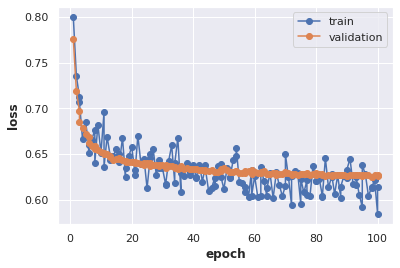

In [3]:
train_info = pd.read_csv('Smiles-LSTM_ChEMBL28_prior_info.csv')

plt.plot(train_info.epoch, train_info.train_loss, '-o',label='train')
plt.plot(train_info.epoch, train_info.val_loss, '-o', label='validation')

plt.xlabel('epoch', weight='bold')
plt.ylabel('loss', weight='bold')

plt.legend()
plt.show()

# PhysChem properties

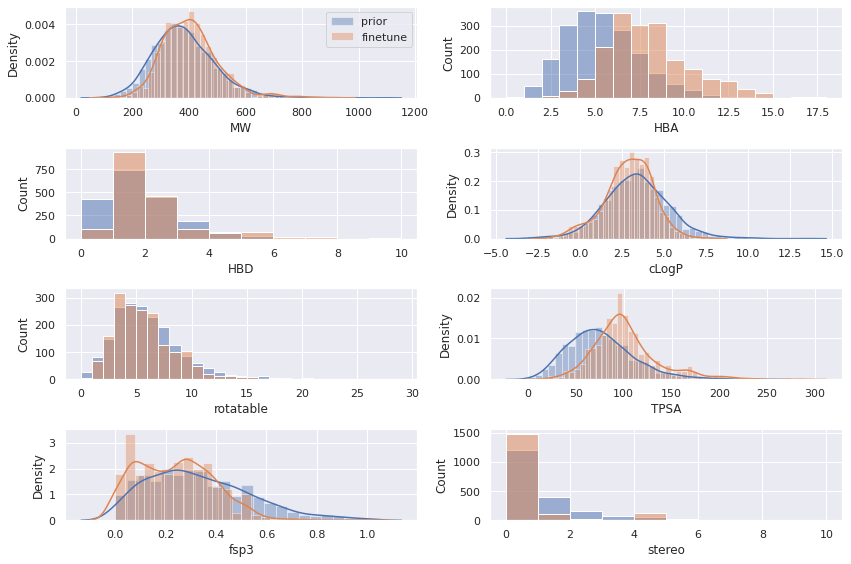

In [4]:
fig, axes = plt.subplots(4, 2, figsize=(12,8))
axes = axes.flatten()

mask = output.set == 'prior'

for i, col in enumerate(['MW','HBA','HBD','cLogP','rotatable','TPSA','fsp3','stereo']):
    series_prior = output[col][mask]
    series_finetune = output[col][~mask]
    
    if series_prior.dtype == int:
        sns.histplot(series_prior, ax=axes[i], binwidth=1, label='prior', color=colors[0], alpha=0.5)
    else:
        sns.distplot(series_prior, ax=axes[i], label='prior')
    
    if series_finetune.dtype == int:
        sns.histplot(series_finetune, ax=axes[i], binwidth=1, label='finetune', color=colors[1], alpha=0.5)
    else:
        sns.distplot(series_finetune, ax=axes[i], label='finetune')
        
        
axes[0].legend()

plt.tight_layout()
plt.show()

# Prior sample

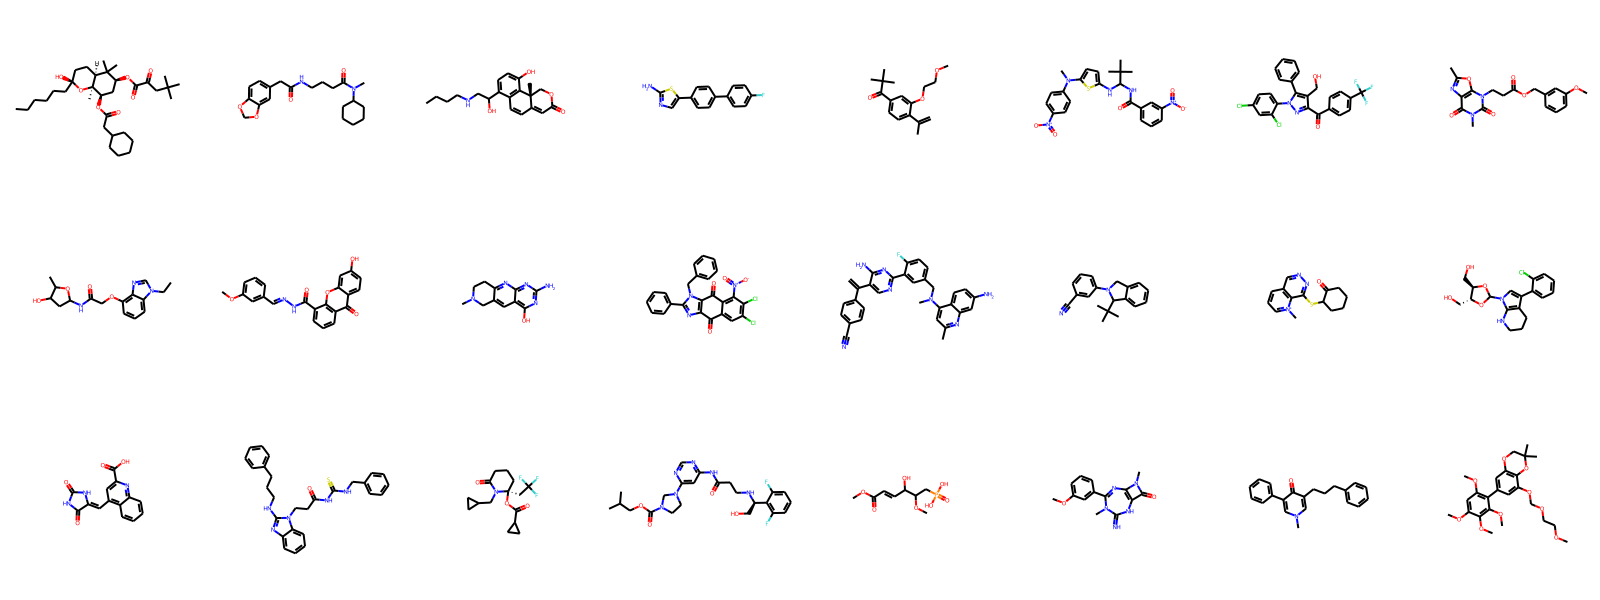

In [10]:
mask = output.set == 'prior'

Draw.MolsToGridImage(output.ROMol[mask].sample(24), molsPerRow=8)

# Finetuning sample

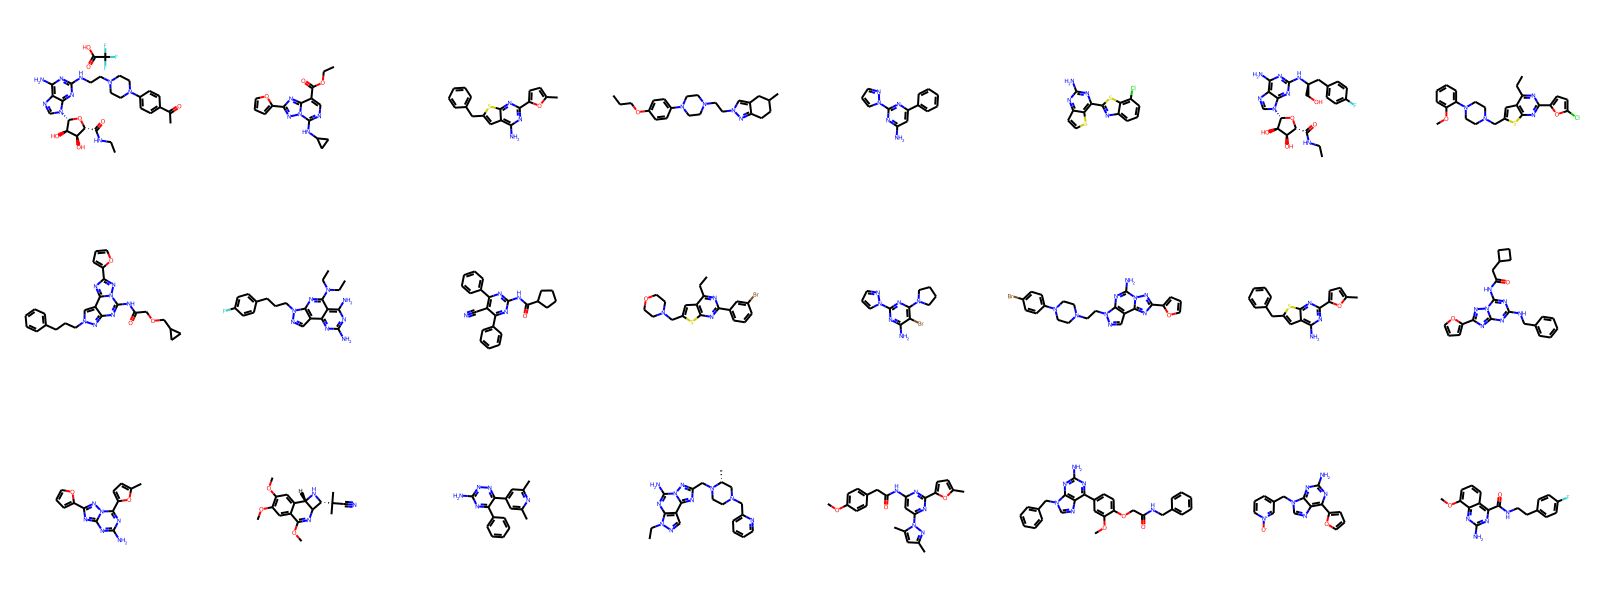

In [11]:
mask = output.set == 'prior'

Draw.MolsToGridImage(output.ROMol[~mask].sample(24), molsPerRow=8)